In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3

In [4]:
dataset=tf.keras.preprocessing.image_dataset_from_directory('../dataset/',
                                                    shuffle=True,
                                                    image_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                    batch_size=BATCH_SIZE)
                                                

Found 13962 files belonging to 8 classes.


In [5]:
class_names=dataset.class_names
print(class_names)

['Baterial_spot', 'Curl_virus', 'Early_blight', 'Healthy', 'Late_blight', 'Leaf_mold', 'Septoria_leaf_spot', 'Target_spot']


In [6]:
dataset.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [7]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch)
    print(label_batch)  

tf.Tensor(
[[[[174. 179. 172.]
   [174. 179. 172.]
   [174. 179. 172.]
   ...
   [171. 177. 167.]
   [170. 176. 166.]
   [170. 176. 166.]]

  [[173. 178. 171.]
   [173. 178. 171.]
   [173. 178. 171.]
   ...
   [170. 176. 166.]
   [171. 177. 167.]
   [171. 177. 167.]]

  [[173. 178. 171.]
   [173. 178. 171.]
   [173. 178. 171.]
   ...
   [169. 175. 165.]
   [171. 177. 167.]
   [172. 178. 168.]]

  ...

  [[ 82.  81.  86.]
   [ 82.  81.  86.]
   [ 82.  81.  86.]
   ...
   [ 80.  80.  80.]
   [ 81.  81.  81.]
   [ 86.  86.  86.]]

  [[ 80.  79.  84.]
   [ 79.  78.  83.]
   [ 78.  77.  82.]
   ...
   [ 80.  80.  80.]
   [ 81.  81.  81.]
   [ 86.  86.  86.]]

  [[ 88.  87.  92.]
   [ 85.  84.  89.]
   [ 83.  82.  87.]
   ...
   [ 78.  78.  78.]
   [ 76.  76.  76.]
   [ 80.  80.  80.]]]


 [[[112. 118. 134.]
   [111. 117. 133.]
   [104. 110. 126.]
   ...
   [110. 113. 132.]
   [115. 118. 137.]
   [ 99. 102. 121.]]

  [[117. 123. 139.]
   [112. 118. 134.]
   [ 98. 104. 120.]
   ...
   [109. 1

In [8]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())  

(32, 256, 256, 3)
[6 6 0 0 6 6 1 0 0 1 1 6 3 3 6 0 5 1 1 0 1 1 5 0 1 5 7 4 2 4 1 0]


In [9]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


## Data Visualization

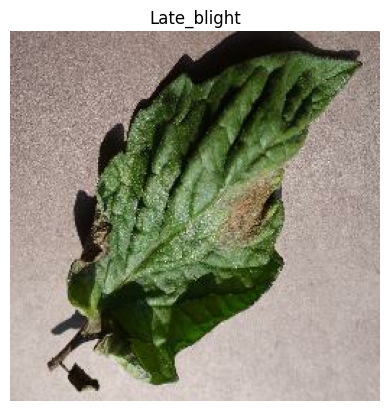

In [10]:
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.title(class_names[label_batch[0]])
    plt.axis('off')

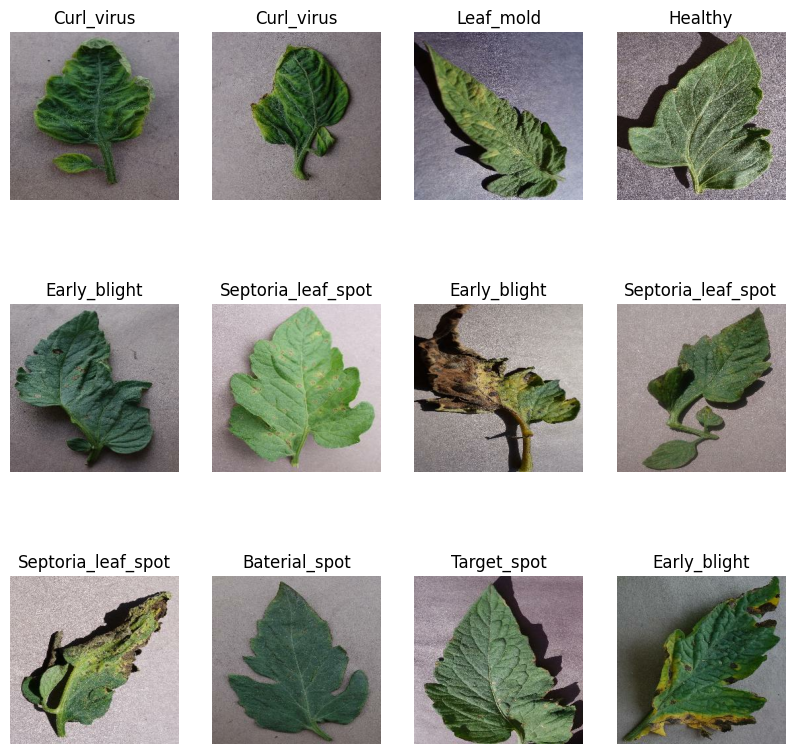

In [11]:
plt.figure(figsize=(10,10))

for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

plt.show()

In [12]:
# len(dataset)
# # train_ds=len(dataset)*0.8
# train_ds=dataset.take(349)
# len(train_ds)
# test_val_ds=dataset.skip(len(train_ds))
# len(test_val_ds)
# val_ds=dataset.skip(len(train_ds)).take(44)
# test_ds=dataset.skip(len(train_ds)).skip(44).take(44)

## Function for splitting the dataset

In [13]:
def divide_dataset(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=15000):
    assert (train_split+val_split+test_split==1)
    ds_size=len(ds)

    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)

    train_size=int(ds_size*train_split)
    val_size=int(ds_size*val_split)
    test_size=int(ds_size*test_split)

    train_ds=dataset.take(train_size)
    val_ds=dataset.skip(train_size).take(val_size)
    test_ds=dataset.skip(train_size).skip(val_size).take(test_size)

    return (train_ds, val_ds, test_ds)

In [14]:
train_ds, val_ds, test_ds =divide_dataset(dataset)

In [15]:
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

349
43
43


## Cache,Shuffle and Prefetch the dataset

In [16]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [17]:
resize_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1./255),
])

In [18]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2),

])

In [19]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 8

In [20]:
from tensorflow.keras import models, layers
from tensorflow.keras import Sequential 

In [21]:
model=Sequential([
    resize_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')

])

model.build(input_shape=input_shape)

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [23]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [24]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=10,
)

Epoch 1/10


349/349 [==============================] - 1147s 3s/step - loss: 1.3793 - accuracy: 0.4905 - val_loss: 1.7664 - val_accuracy: 0.5000
Epoch 2/10
349/349 [==============================] - 1044s 3s/step - loss: 0.8439 - accuracy: 0.7057 - val_loss: 1.7745 - val_accuracy: 0.5531
Epoch 3/10
349/349 [==============================] - 1033s 3s/step - loss: 0.6169 - accuracy: 0.7810 - val_loss: 0.7325 - val_accuracy: 0.7355
Epoch 4/10
349/349 [==============================] - 1142s 3s/step - loss: 0.5277 - accuracy: 0.8123 - val_loss: 0.7234 - val_accuracy: 0.7631
Epoch 5/10
349/349 [==============================] - 1705s 5s/step - loss: 0.4529 - accuracy: 0.8426 - val_loss: 0.6352 - val_accuracy: 0.7929
Epoch 6/10
349/349 [==============================] - 1572s 5s/step - loss: 0.4006 - accuracy: 0.8597 - val_loss: 0.6086 - val_accuracy: 0.8350
Epoch 7/10
349/349 [==============================] - 1582s 5s/step - loss: 0.3577 - accuracy: 0.8753 - val_loss: 0.6272 - val_accuracy: 0.8045
Epo

In [25]:
model.evaluate(test_ds)

43/43 [==============================] - 33s 761ms/step - loss: 0.3982 - accuracy: 0.8648


[0.39822521805763245, 0.8648256063461304]

In [26]:
history

In [27]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 349}

In [28]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [29]:
type(history.history['loss'])

list

In [30]:
len(history.history['loss'])

10

In [31]:
(history.history['loss'])

[1.379342794418335,
 0.8439372777938843,
 0.6169394254684448,
 0.5277339220046997,
 0.4528624415397644,
 0.4005541503429413,
 0.3577446937561035,
 0.307088702917099,
 0.284371018409729,
 0.25258779525756836]

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [36]:
EPOCHS=10

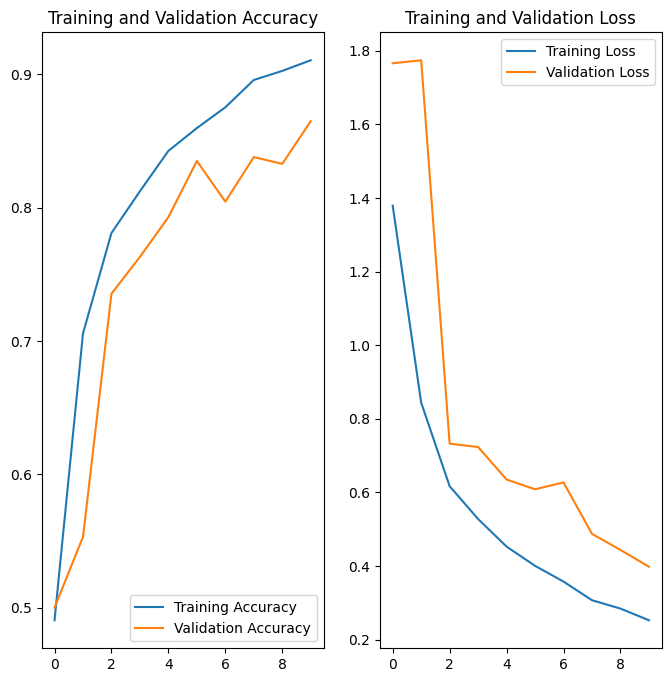

In [37]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Target_spot
1/1 [==============================] - 1s 995ms/step
predicted label: Target_spot


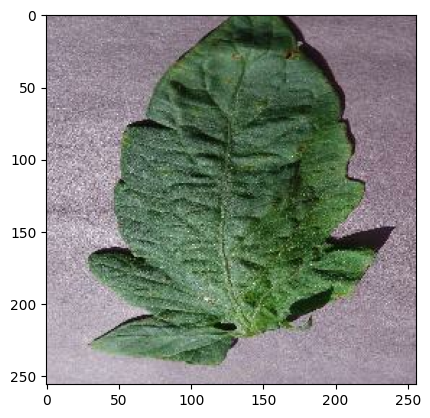

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 74ms/step


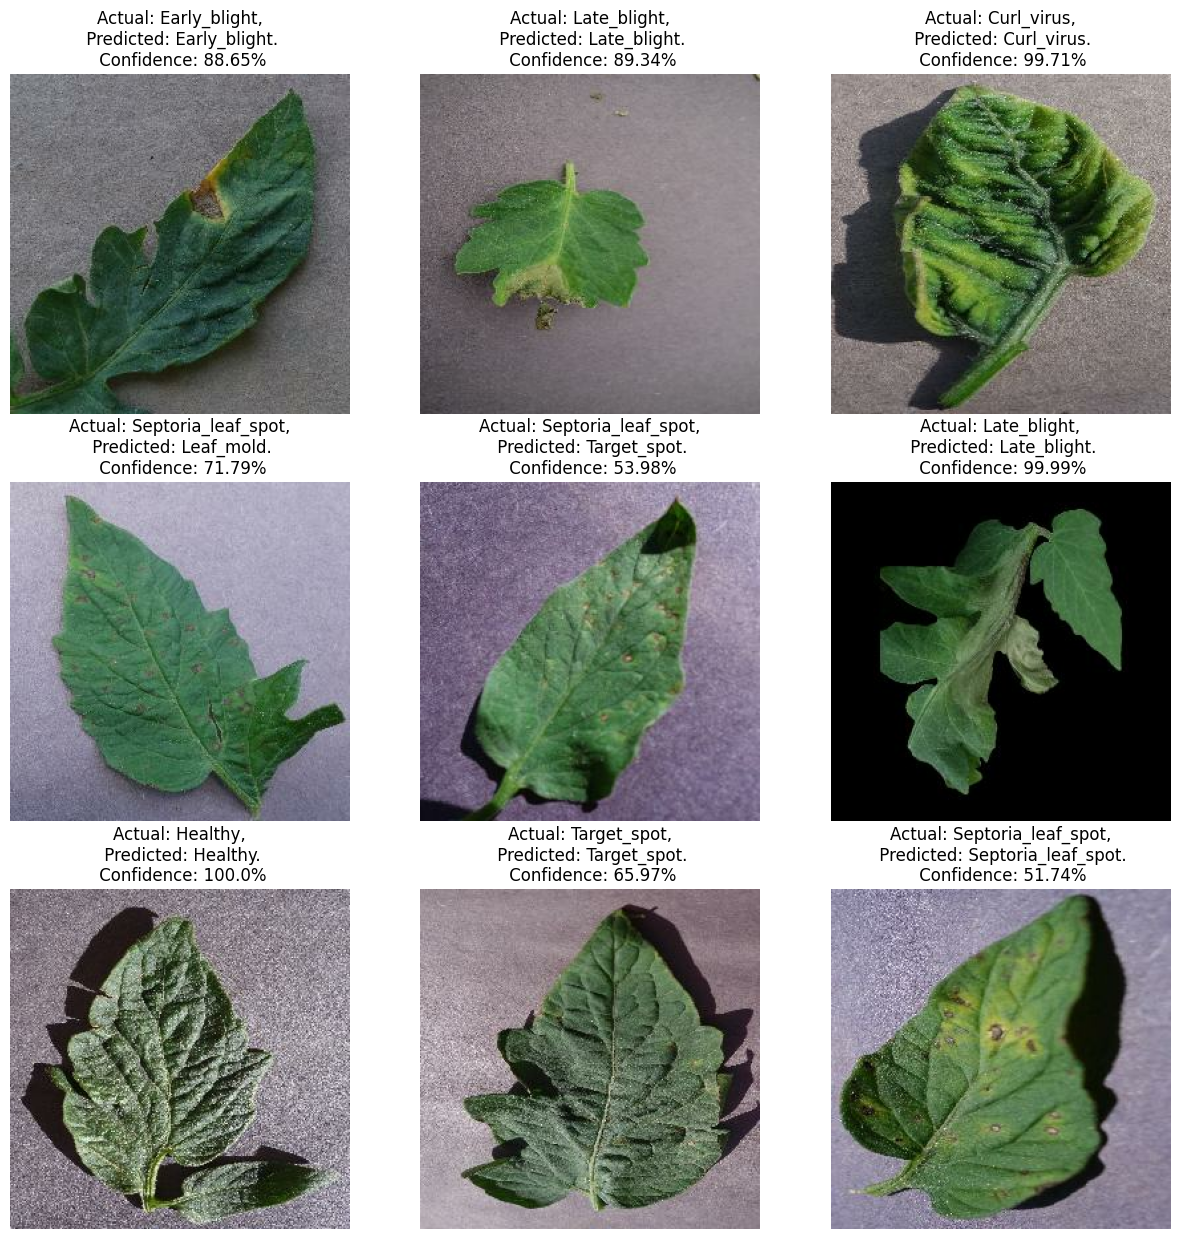

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [38]:
model_version=2
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/2\assets


INFO:tensorflow:Assets written to: ../models/2\assets
